# Plotting in Python: A quick rundown

Plotting. We all gotta do it. but how do we do it? Today that's exactly what we're going to talk about. We're going to start very basic: what are the elements of the plots themselves that we can interact with, how do we draw on things, how do we choose what to draw on. Then we will talk about **what** to draw: lines, scatters, and histograms. Finally, throughout the whole tutorial: how do we change aspects of plots to make them look better?

## Table of Contents
1. [What do we plot on?](#Whatdoweploton)
2. [Line plots](#lineplots)
   
   2a. [Changing plot elements](#changeplotelts)
   
   2b. [Multiple plots in one](#addmoreplots)

3. [Scatter plots](#scatterplots)

   3a. [Changing plot color](#scattercolor)

4. [Histograms](#histograms)

<a id='Whatdoweploton'></a>


## What do we plot on?

Let's start by importing the packages we'll need:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The first two packages are data packages: numpy represents data as matrices, pandas as tables (like an excel/google worksheet). We'll get into those later. The last two are plotting: matplotlib is the basis for almost all plots people make in Python, seaborn builds off of matplotlib to make plotting pretty plots easier. Starting with matplotlib: this has two main elements you'll interact with, the **Figure** and the **Axis**.

In [2]:
figure = plt.Figure()

You can think of the **Figure** as the total amount of space we have to draw. Imagine making a poster for a conference; the **Figure** is the total amount of paper you have to use. You can split this **Figure** up into separate **Axes**; you can think of these as each of your different boxes you put stuff into on your poster. They're where you actually draw each individual plot. We can access the axes through several methods. If we just want one axis, we can do the following:

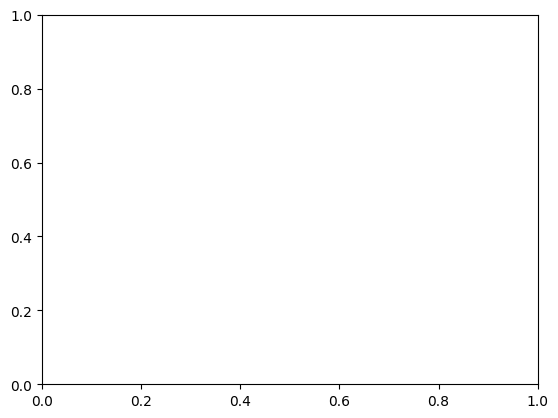

In [3]:
ax = plt.gca()

Now we have a single axis that we can manipulate and draw on. 'gca' stands for 'get current axis'; it will access the axis on the figure we're currently focusing on. This is important if we have multiple figures, but we won't be doing that in this tutorial. We can also get axes by using 'plt.subplots', which lets us make grids of plots very easily:

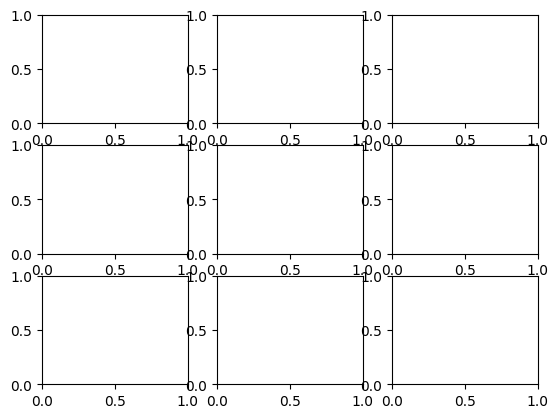

[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]


In [4]:
fig,axs = plt.subplots(nrows=3,ncols=3)
plt.show()
print(axs)

This function gives us a figure, and an array of axes that we can index and manipulate independently. The last method of setting up subplots that I'll cover is using 'plt.subplot_mosiac' (thanks for the hot tip @Pranjal). This lets you much more easily set up complex plots of different sizes on the same figure. For instance:

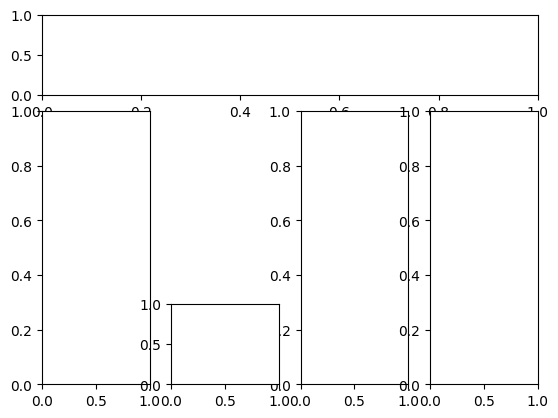

In [5]:
mosaic = '''
        aaaa
        b.cd
        b.cd
        becd
        '''
fig, ax = plt.subplot_mosaic(mosaic)
plt.show()

We set up a string, 'mosaic', initially --- this defines our layout. Each individual letter corresponds to a different plot. So what we've defined is a long row at the top, three tall columns, and one square at the bottom -- with extra spacing indicated by '.'. We can then access each axis using our 'ax' variable as a dictionary. The top row corresponds to ax['a'], the left column to ax['b'], and so on. Pretty nice! What kind of cases would it be helpful for you to use this version vs. the other two?

Now that we have our axes, though... what do we....*do* with them?

<a id='Whatdoweplot'></a>

### Using our plots

To use our plots, we need some data. Let's use some nice, open dataset from pandas: the iris dataset and the sea ice dataset. Seaborn has these specifically for us to practice plotting, yay! Irises (fun fact that I didn't know initially) are flowers. They are very pretty. And also different from each other! The iris dataset has three species and a few different measured attributes. The sea ice dataset has two attributes, and shows change over time.

In [6]:
import matplotlib as mpl
iris = sns.load_dataset("iris").dropna()
iris['petal_size'] = iris['petal_length']*iris['petal_width']
seaice = sns.load_dataset('seaice').dropna()
print(f'Iris attributes: {list(iris.columns)}')
print(f'Unique irises: {iris.species.unique()}')
print(f'Number of iris data points: {len(iris)}')
print(f'Sea ice attributes: {list(seaice.columns)}')
print(f'Number of sea ice data points: {len(seaice)}')
seaice['DateFloat'] = mpl.dates.date2num(seaice['Date'])
seaice['DateFloat'] = (seaice['DateFloat'] - seaice['DateFloat'][0])/362.25 + seaice['Date'].dt.year[0]

Iris attributes: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'petal_size']
Unique irises: ['setosa' 'versicolor' 'virginica']
Number of iris data points: 150
Sea ice attributes: ['Date', 'Extent']
Number of sea ice data points: 13175


<a id='lineplots'></a>

### Lineplots

Great! Let's take a look at the sea ice dataset first. This is a dataset with measurements over time, so it would make sense to plot this as a line. Let's do that in two separate ways: with matplotlib (left), and seaborn (right).

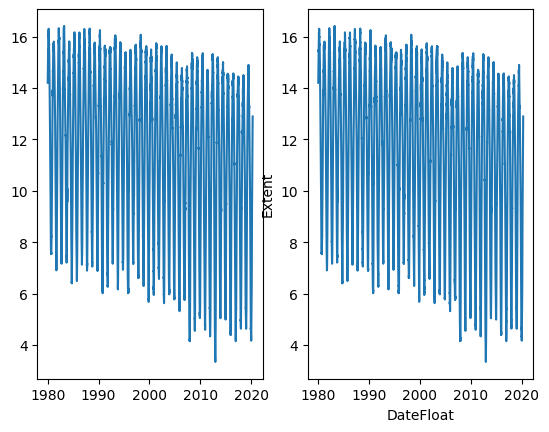

In [7]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
ax1.plot(seaice['DateFloat'],seaice['Extent'])
sns.lineplot(seaice,x='DateFloat',y='Extent',ax=ax2)
plt.show()

These two plots look almost the exact same! The only difference is that the Seaborn plot already has labels on it. One thing that you might also notice is that these plots look like garbage. Take some time: what looks bad about these? What would you change?

To me, there's all sorts of stuff. They're too small and squished, they should be longer than they are wide, all the labels are squished together, the plots are slightly overlapping, the colors are kind of boring, and there's no title. Let's fix all of these!

<a id='changeplotelts'></a>

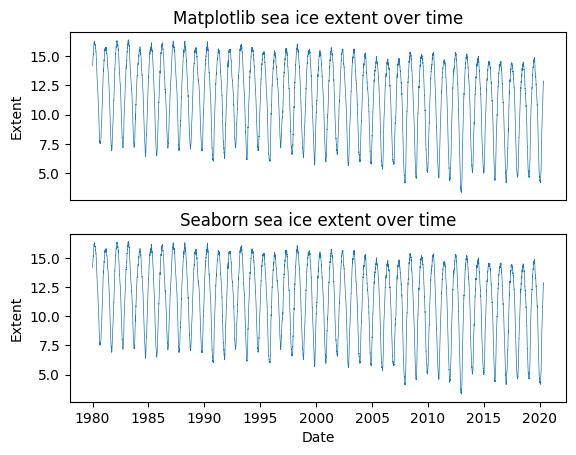

In [8]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1)
ax1.plot(seaice['Date'],seaice['Extent'],linewidth=0.5,linestyle='-')
ax1.set_ylabel('Extent')
ax1.set_xticks([])
ax1.set_title("Matplotlib sea ice extent over time")
sns.lineplot(seaice,x='DateFloat',y='Extent',ax=ax2,linewidth=0.5,linestyle='-')
ax2.set_title('Seaborn sea ice extent over time')
ax2.set_xlabel("Date")
plt.show()

Nice! This generally looks better. The main lesson here is that if we want to manipulate elements of the plot (axis labels, xticks, etc.), we can do so using 'ax.set_...'. Some other things we might be interested in are: 
1. plotting regression lines on the same plot to see trends over time, and
2. plotting % change between measurements across time.

Let's do all of these! First, I'll show you how to plot two lines *on different scales* on the same plot for the % change in measurements. Then we'll go over two methods of plotting regression lines. First, we can use seaborn's '[regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)' to plot a regression line. Second, we can use seaborn's '[lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)' to do the same thing, but with slightly more flexibility!

<a id='addmoreplots'></a>

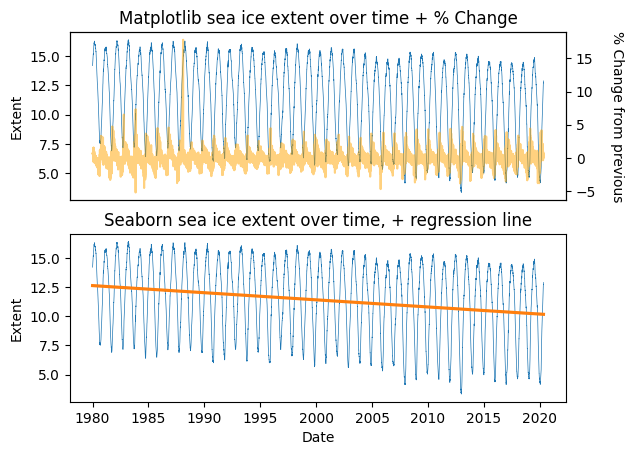

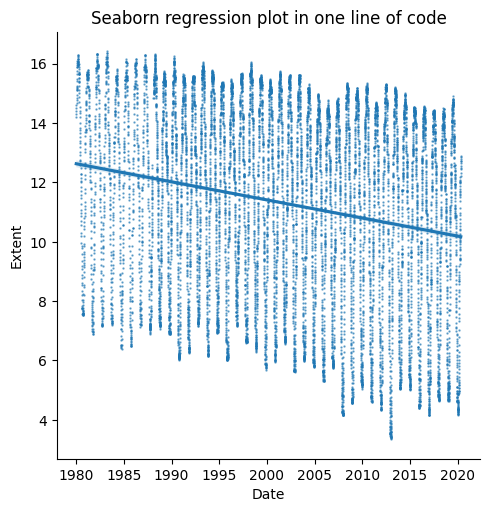

In [9]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1)
### 
ax1.plot(seaice['DateFloat'],seaice['Extent'],linewidth=0.5,linestyle='-')
ax12 = ax1.twinx()
ax12.plot(seaice['DateFloat'][1:],np.diff(seaice['Extent'])/seaice['Extent'][:-1] * 100,color='orange',alpha=0.5)
ax1.set_ylabel('Extent')
ax12.set_ylabel("% Change from previous",rotation=270,labelpad=20)
ax1.set_xticks([])
ax1.set_title("Matplotlib sea ice extent over time + % Change")
sns.lineplot(seaice,x='DateFloat',y='Extent',ax=ax2,linewidth=0.5,linestyle='-')
sns.regplot(seaice,x='DateFloat',y='Extent',ax=ax2,scatter=False)
ax2.set_title('Seaborn sea ice extent over time, + regression line')
ax2.set_xlabel("Date")
plt.show()


sns.lmplot(seaice,x='DateFloat',y='Extent',scatter_kws={'s':0.5,'alpha':0.6})
ax = plt.gca()
ax.set_title("Seaborn regression plot in one line of code")
ax.set_xlabel("Date")
plt.show()

Great! Now we have plots with multiple things on them, and can make linear regression plots easily. A good first step for exploring our data and finding trends! Line plots are a good way to explore time series data. But what about data that aren't time series? Let's check out some scatter plots, to explore pairwise relationships in our iris dataset.

<a id='scatterplots'></a>

### Scatter Plots

Let's examine our beautiful flowers. We have four attributes, let's compare sepal length to sepal width. We can use the *scatter* function to do that!

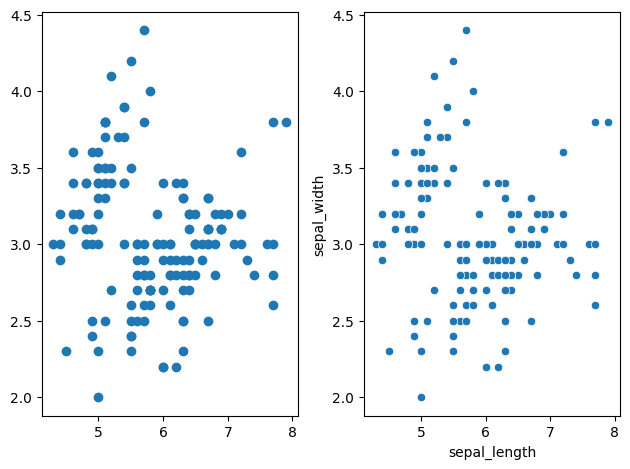

In [10]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
### 
ax1.scatter(iris['sepal_length'],iris['sepal_width'])#,linewidth=0.5,linestyle='-')
sns.scatterplot(iris,x='sepal_length',y='sepal_width',ax=ax2)
plt.tight_layout()
plt.show()

Scatterplots can help us visualize differences in our data. We can do this super easily if we add in a *hue* to our plot.

<a id='scattercolor'></a>

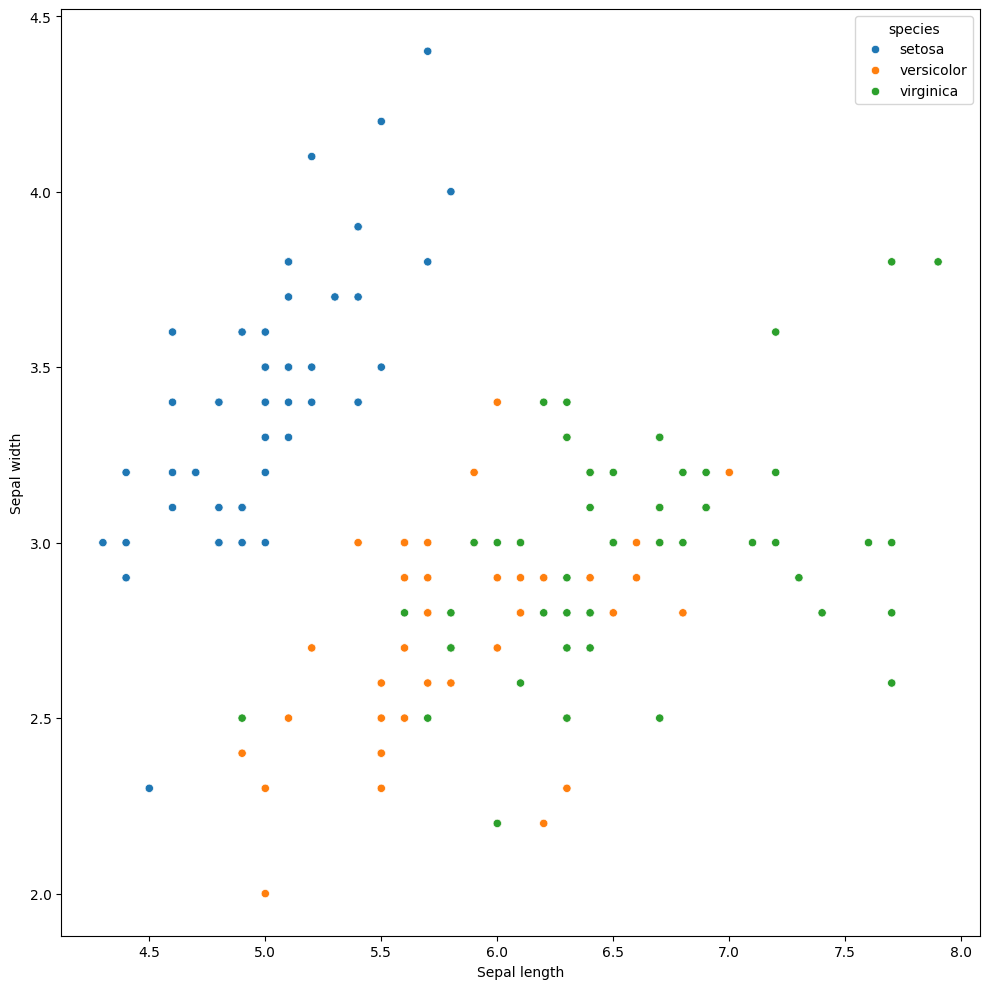

In [11]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
### 
sns.scatterplot(iris,x='sepal_length',y='sepal_width',hue='species',ax=ax1)
plt.tight_layout()
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
plt.show()

Uh oh! the legend is wayyy too small! let's tone it down a notch. We can do that super easily!

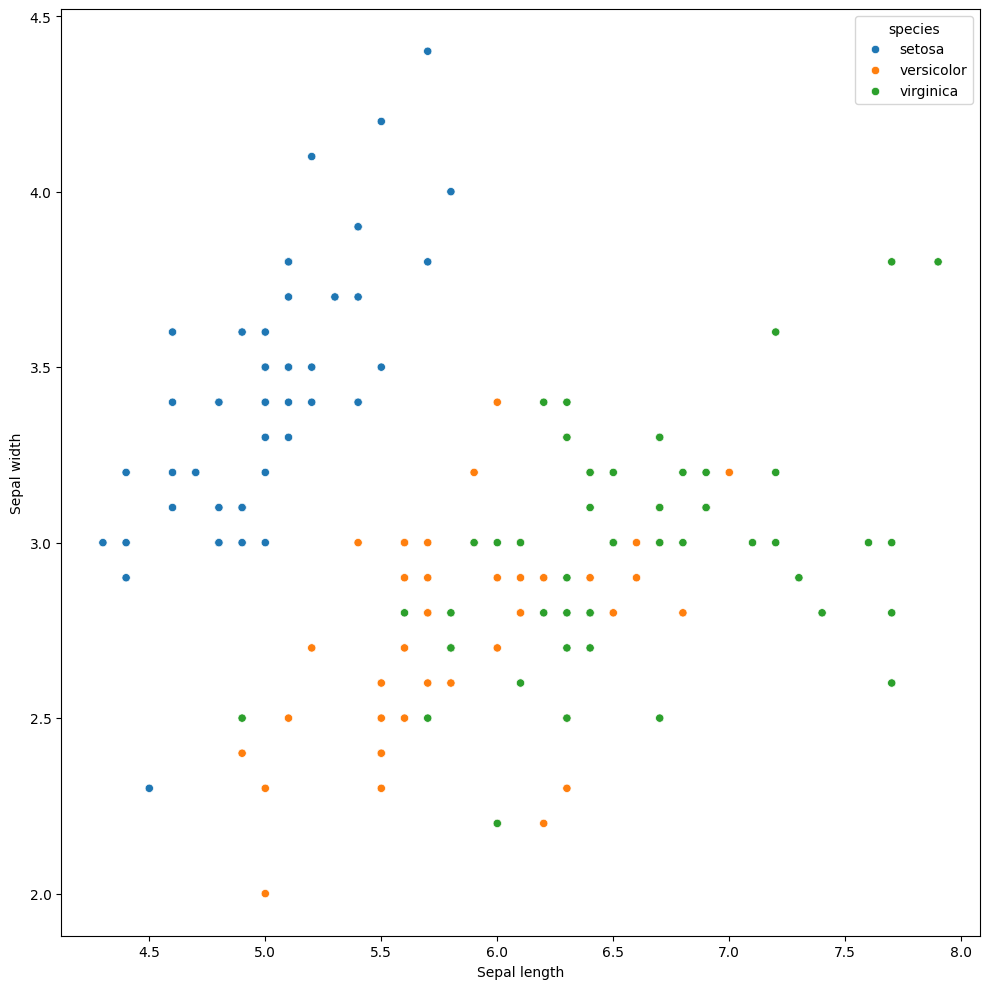

In [12]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
### 
sns.scatterplot(iris,x='sepal_length',y='sepal_width',hue='species',ax=ax1)
plt.tight_layout()

plt.rc('legend',fontsize=10) # using a size in points
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
plt.show()

<a id='histograms'></a>

<a id='histograms'></a>

### Histograms & KDE plots

Finally, let's get to histograms & KDE plots: we can check out our distributions of data this way! We can do all of these super easily in seaborn as well.

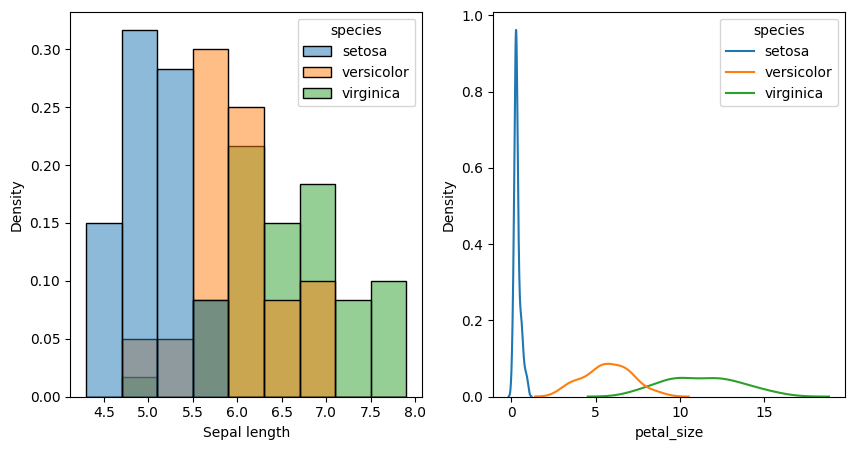

In [13]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

sns.histplot(iris,x='sepal_length',hue='species',stat='density',ax=ax1)
ax1.set_xlabel('Sepal length')
sns.kdeplot(iris,x='petal_size',hue='species',ax=ax2)
plt.show()

There's a whole lot of other good practices in plotting to get into -- choosing the right color, scale, visualization type -- [here's a good place to start for exploring those principles](https://seaborn.pydata.org/tutorial/color_palettes.html). Seaborn as a whole has a bunch of good plotting tutorials at [this link](https://seaborn.pydata.org/tutorial.html) too, so give those a look if you're interested as well!